In [7]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [8]:
actions_df = pd.read_csv("actions_detail.csv")
actions_df.head()

,action_detail,user_id,action,count_action_type,device_type,secs_elapsed,Category
0,view_search_results,1771026,1776885,1776885,1776885,1776788,Searching
1,p3,1371626,1376550,1376550,1376550,1376508,Payment
2,-unknown-,1028222,1031141,1031141,1031141,1019466,Miscellaneous
3,wishlist_content_update,704782,706824,706824,706824,706787,Wishlist
4,user_profile,654626,656839,656839,656839,656817,Admin


In [9]:
actions_df_2 = actions_df.filter(["secs_elapsed", "Category"], axis=1)
actions_df_2.head()

,secs_elapsed,Category
0,1776788,Searching
1,1376508,Payment
2,1019466,Miscellaneous
3,706787,Wishlist
4,656817,Admin


In [10]:
new_actions_df = actions_df_2.dropna()
new_actions_df.head()

,secs_elapsed,Category
0,1776788,Searching
1,1376508,Payment
2,1019466,Miscellaneous
3,706787,Wishlist
4,656817,Admin


In [11]:
categorized_df = new_actions_df.groupby(["Category"], as_index=False).sum()
categorized_df_2 = categorized_df.sort_values('secs_elapsed', ascending=False)
categorized_df_2.head()

,Category,secs_elapsed
9,Searching,2654542
0,Admin,1873300
6,Payment,1523413
5,Miscellaneous,1024813
10,Wishlist,876666


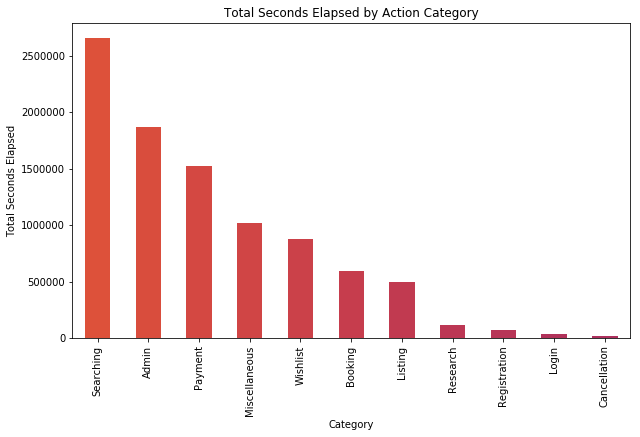

In [15]:
color = cm.inferno_r(np.linspace(.4,.8, 30))
ax = categorized_df_2.plot(x="Category", y="secs_elapsed", kind="bar", legend=False, figsize=(10,5.8), color=color, title="Total Seconds Elapsed by Action Category")
ax.set_ylabel("Total Seconds Elapsed")
plt.savefig("secs_elapsed.png")